# <font color='dark'>**Detecção de texto em placas de carro**</h1>

# <font color='dark'>**Aula 3**</h1>

### Importação das bibliotecas

In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

### Leitura da imagem

In [2]:
img_names = ['trecho_livro', 'placa_carro1', 'placa_carro2', 'placa_carro3']

In [3]:
img = cv2.imread(f'./data/{img_names[1]}.png')

#### Limiarização de Otsu

Podemos ver a intensidade de cor de uma imagem através de histogramas. A documentação do opencv sugere algumas formas de criar histogramas a partir de imagens:

- [Documentação OpenCV: Histogramas](https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html)

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
img

array([[ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   3, ...,   5,   5,   5],
       ...,
       [ 14,  14, 144, ..., 122, 121, 120],
       [ 14,  14,  14, ...,  14,  14,  14],
       [ 14,  14,  14, ...,  14,  14,  14]], dtype=uint8)

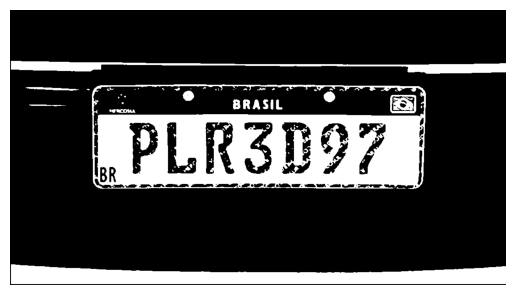

Limiar: 96.0


In [6]:
value, lim_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(cv2.cvtColor(lim_otsu, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print(f'Limiar: {value}')

### Morgológias

É possível aplicar transformações na figura de forma a expandir, reduzir ou modificar a estrutura dos pixels da imagem a partir de um Kernel. São chamadas de transformações morfológicas.

As transformações morfológicas básicas são erosão e dilatação.

A partir delas são construídas as transformações de abertura, fechamento, gradiente, top hat (cartola) e black hat (chapéu preto).

- [Documentação OpenCV: Transformações Morfológicas](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html)

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

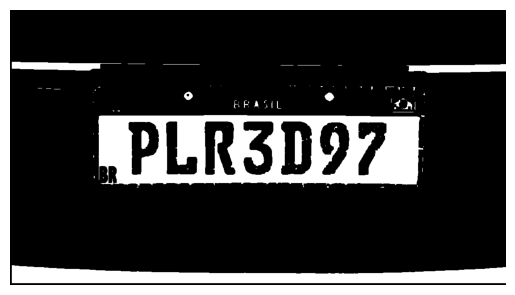

In [8]:
erode_img = cv2.erode(lim_otsu, kernel)

plt.imshow(cv2.cvtColor(erode_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

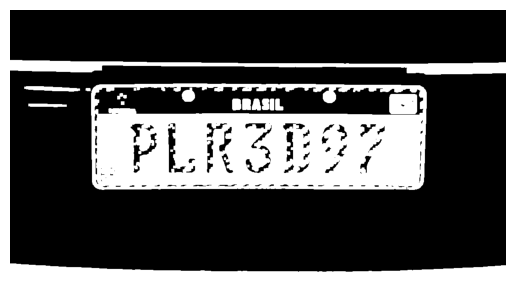

In [9]:
dilate_img = cv2.dilate(lim_otsu, kernel)

plt.imshow(cv2.cvtColor(dilate_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

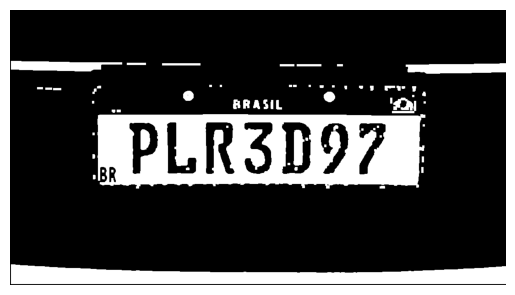

In [10]:
open_img = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)

plt.imshow(cv2.cvtColor(open_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

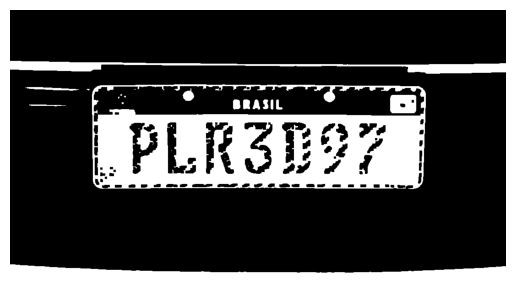

In [11]:
close_img = cv2.morphologyEx(lim_otsu, cv2.MORPH_CLOSE, kernel)

plt.imshow(cv2.cvtColor(close_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

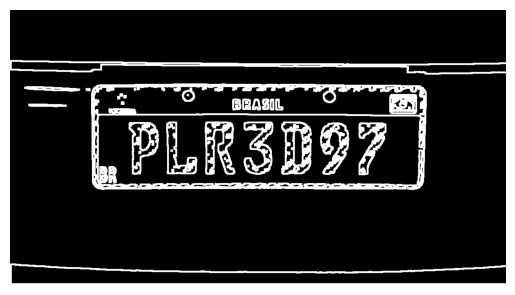

In [12]:
gradient_img = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)

plt.imshow(cv2.cvtColor(gradient_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

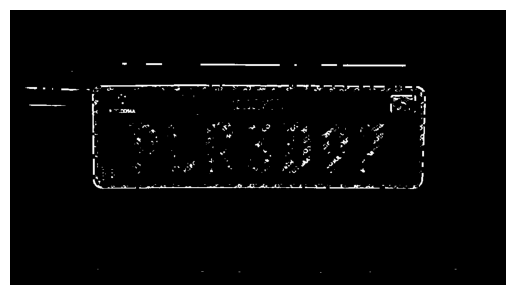

In [13]:
tophat_img = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel)

plt.imshow(cv2.cvtColor(tophat_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

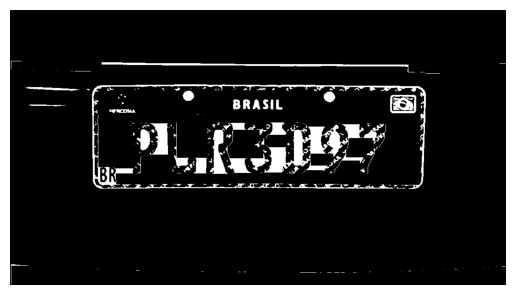

In [14]:
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
tophat_rect_img = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel_rect)

plt.imshow(cv2.cvtColor(tophat_rect_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

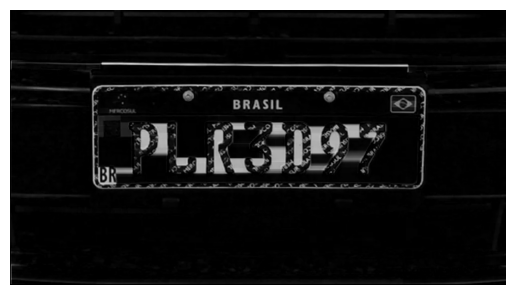

In [15]:
tophat_react_img_real = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel_rect)

plt.imshow(cv2.cvtColor(tophat_react_img_real, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

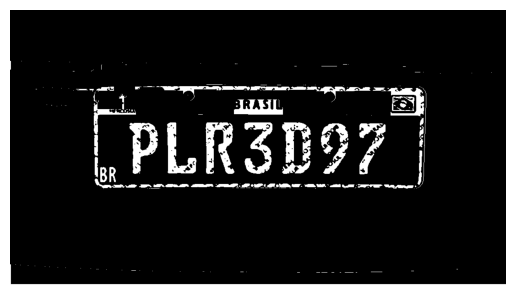

In [16]:
blackhat_img = cv2.morphologyEx(lim_otsu, cv2.MORPH_BLACKHAT, kernel_rect)

plt.imshow(cv2.cvtColor(blackhat_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

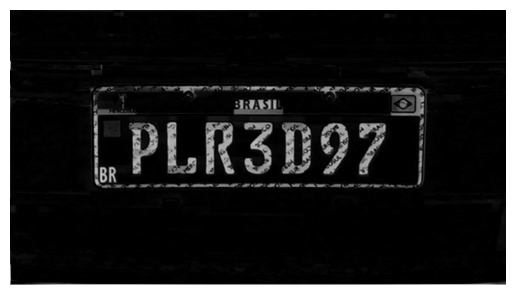

In [17]:
blackhat_img_real = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel_rect)

plt.imshow(cv2.cvtColor(blackhat_img_real, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [18]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(erode_img, lang='por', config=config_tesseract)
print(text)

, PLRSD97 |
— :” NS ss

